In [8]:
# import packages
import os

import random
import seaborn as sns
import cv2
# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL

import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
import h5py
import plotly.graph_objs as go
from IPython.display import Image, display
import joypy
import warnings
warnings.filterwarnings("ignore")

In [9]:
os.getcwd()

'c:\\Users\\jieun\\OneDrive\\문서\\GitHub\\personal_project\\neuroimaging'

In [10]:
# 환자별 (subject) 시가점마다의 fmri signal 값을 담고 있는 데이터
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<Axes: xlabel='timepoint', ylabel='signal'>

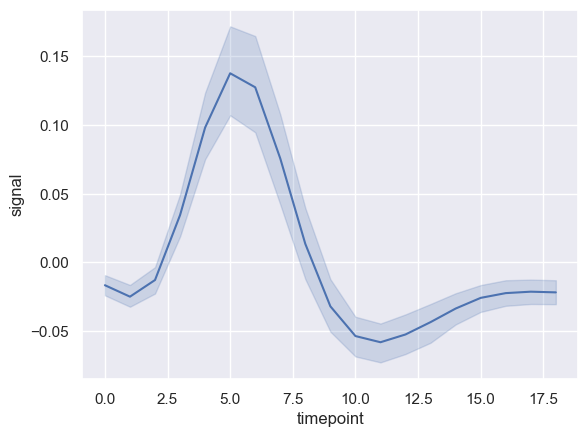

In [11]:
sns.set(style = "darkgrid")
sns.lineplot(x = 'timepoint', y = 'signal', data = fmri)

<Axes: xlabel='timepoint', ylabel='signal'>

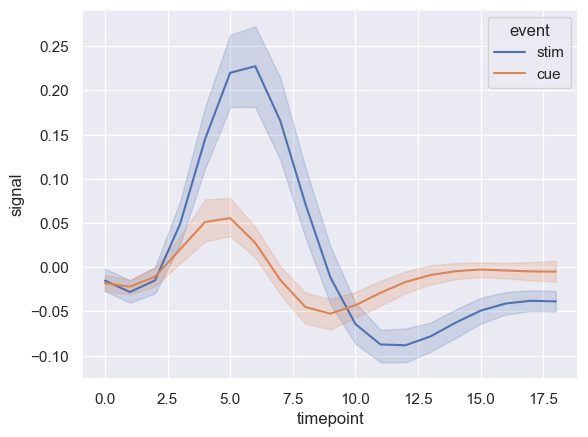

In [12]:
# 이벤트별로 그래프 그리기
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data = fmri)

In [14]:
# 데이터 전처리

# 칼럼명 변경
fmri.columns = ['Subject', 'Timestamp', 'Event', 'Region', 'Signal']

# subject로 할 변수 지정
fmri = fmri.set_index('Subject')

# string 변수들의 앞자리를 대문자로 바꿈
fmri.replace({'frontal': 'Frontal', 'parietal': 'Parietal', 'cue': 'Cue', 'stim': 'Stim'}, inplace=True)

# 확인
fmri.head()

,Timestamp,Event,Region,Signal
Subject,,,,
s13,18,Stim,Parietal,-0.017552
s5,14,Stim,Parietal,-0.080883
s12,18,Stim,Parietal,-0.081033
s11,18,Stim,Parietal,-0.046134
s10,18,Stim,Parietal,-0.037970


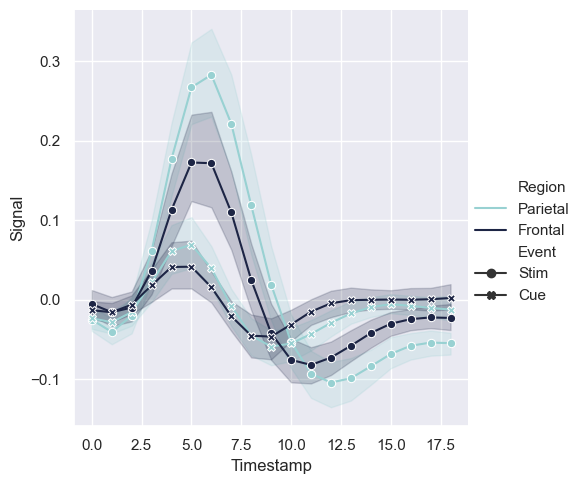

In [17]:
# 시각화

sns.relplot(x = 'Timestamp', y = 'Signal', hue = 'Region', style = 'Event',
            palette = 'ch:rot=-.25, hue=1,light=.75',
            dashes = False, markers = True, kind = 'line', data = fmri)

<Axes: xlabel='Timestamp', ylabel='Signal'>

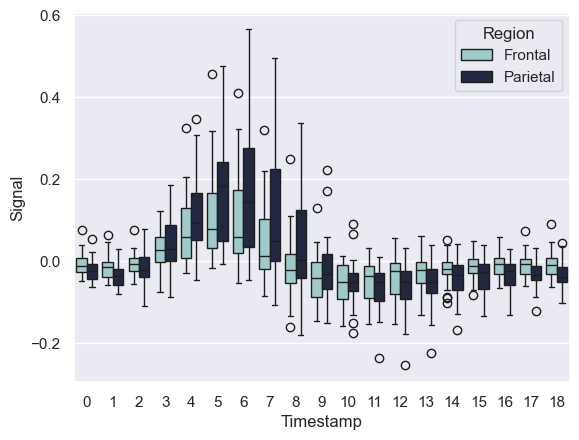

In [19]:
sns.boxplot(x = "Timestamp", y = "Signal", hue = "Region",
            data = fmri, 
            palette="ch:rot=-.25,hue=1,light=.75")

<Axes: xlabel='Timestamp', ylabel='Signal'>

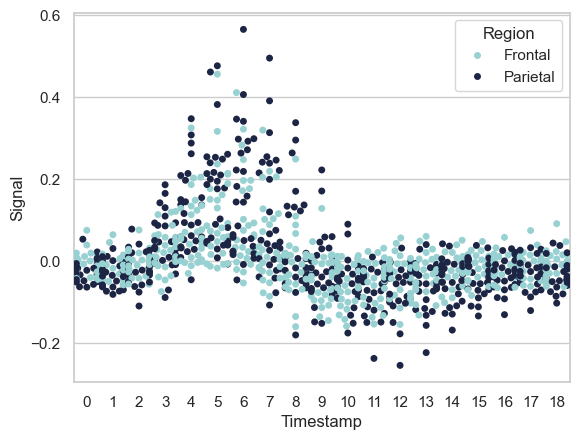

In [20]:
sns.set(style = 'whitegrid')
sns.swarmplot(x = "Timestamp", y = "Signal", hue = "Region", 
              data = fmri, 
              palette="ch:rot=-.25,hue=1,light=.75")

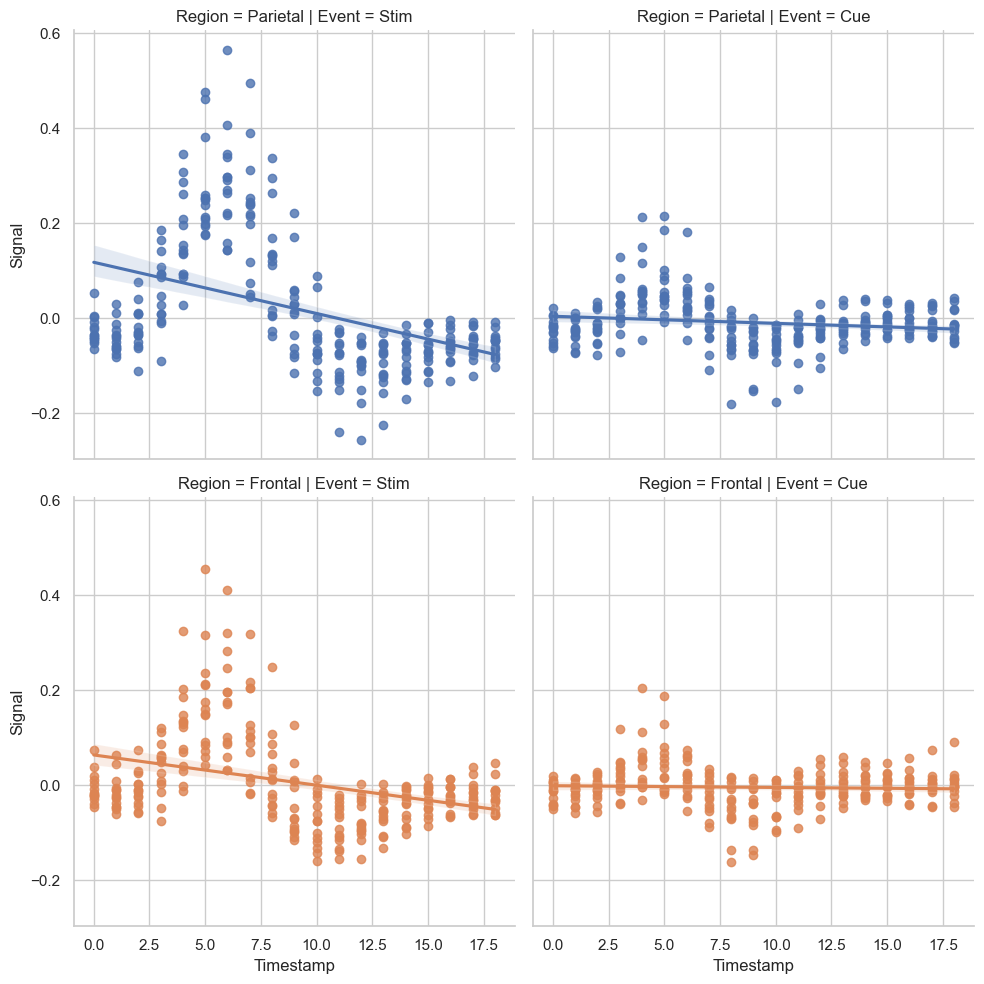

In [21]:
# linear regression and plot
sns.lmplot(x = "Timestamp", y = "Signal", hue = "Region", col = "Event", 
           row = "Region", data = fmri)

In [22]:
from os.path import join
from bids import BIDSLayout
from bids.tests import get_test_data_path
layout = BIDSLayout(join(get_test_data_path(), 'synthetic'))